In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [147]:
class Layer(object):
    """define a layer object"""
    
    def __init__(self, n_input, n_output=None, random_seed=42):
        """Constructer of a layer object"""
        
        self.n_input = n_input
        self.n_output = n_output
        
        np.random.seed(random_seed)
        self.weights = np.random.rand(self.n_input, self.n_output)

    def _sigmoid_forward(self, x):
        """Apply sigmoid function"""
        
        return 1 / (1 + np.exp(-x))
    
    def forward_prop(self, input_x, activation_func='sigmoid'):
        """Implement forward propagation"""
        
        if activation_func == 'sigmoid':
            self.out_x = self._sigmoid_forward(input_x.dot(self.weights))
    
    def backward_prop(self, x_pre, delta_next, weights_next, eta):
        """Implement backward propagation"""
        
        self.delta = self.out_x * (1-self.out_x) * delta_next * weights_next.T 
        
        self.weights -= eta * x_pre.T.dot(self.delta) / x_pre.shape[0]
        
class Output_Layer(Layer):
    """define a output layer object"""
    
    def __init__(self, n_input, n_output=None, random_seed=42):
        """Constructer of a output layer object"""
            
        Layer.__init__(self, n_input, n_output, random_seed)
    
    def _softmax(self, out_x):
        return np.exp(out_x) / np.sum(np.exp(out_x), axis=1)
    
    def backward_prop(self, y_true, y_preds, x_pre, eta):
        """Implement backward propagation (output layer)"""
        
        self.delta = 2 * (y_preds - y_true)
        
        self.weights -= eta * x_pre.T.dot(self.delta) / x_pre.shape[0]
    
    def predict(self):
        """Predict labels"""
        
        # self.pred_prop = self._softmax(self.out_x)
        return np.where(self.out_x > 0.5, 1, 0)
    
    def compute_mse(self, y_true):
        return np.mean(np.square(self.out_x - y_true))

In [178]:
X = np.array([[1, 0, 0], [1, 1, 0], [1, 0, 1], [1, 1, 1]])
y = np.array([1, 0, 0, 1])
y = y.reshape(4, 1)

In [189]:
epochs = 2000
n_neurons = 2
fc_layer = Layer(X.shape[1], n_neurons)
output_layer = Output_Layer(n_neurons, 1)

In [190]:
errors = np.ones(epochs)
for epoch in range(epochs):
    fc_layer.forward_prop(X)
    output_layer.forward_prop(fc_layer.out_x)
    
    y_preds = output_layer.predict()
    output_layer.backward_prop(y, y_preds, x_pre=fc_layer.out_x, eta=0.15)
    fc_layer.backward_prop(x_pre=X, delta_next=output_layer.delta, weights_next=output_layer.weights, eta=0.15)
    
    errors[epoch] = output_layer.compute_mse(y)

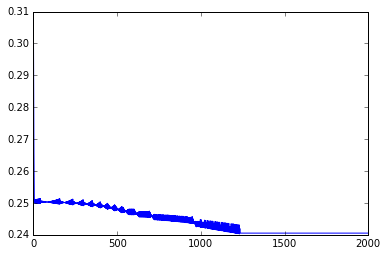

In [191]:
plt.plot(errors)